## Import Libraries

## Read and Process Data

In [2]:
engineered_df = pd.read_csv('engineered_features.csv')

In [3]:
raw_df = pd.read_csv('raw_dataset.csv')

In [4]:
raw_df = raw_df[raw_df['age'].str.contains(">")==False]

In [5]:
raw_df['age'] = raw_df['age'].astype('int')
raw_df['intubated'] = raw_df['intubated'].astype('Int64')
raw_df['vent'] = raw_df['vent'].astype('Int64')
raw_df['dialysis'] = raw_df['dialysis'].astype('Int64')
raw_df['eyes'] = raw_df['eyes'].astype('Int64')
raw_df['motor'] = raw_df['motor'].astype('Int64')
raw_df['verbal'] = raw_df['verbal'].astype('Int64')


In [6]:
## change to integer
raw_df['ptcawithin24h'] = raw_df['ptcawithin24h'].astype('Int64')

In [7]:
# Drop columns with > 30% missing values

raw_df.drop(columns=['physicianspeciality',
                    'physicianinterventioncategory',
                    'apacheversion',
                    'predictedhospitalmortality',
                    'predictedicumortality',
                    'predictedhospitallos',
                    'preopmi',
                    'preopcardiaccath',
                    'Unnamed: 0',
                    'predictediculos',
                    'actualicumortality'], inplace=True)

In [8]:
# Get dummies

one_hot = pd.get_dummies(raw_df[['gender',
                                'ethnicity',
                                'actualhospitalmortality']])

In [9]:
# Final dataset to be used

processed_df = pd.concat([raw_df,one_hot], axis=1)

In [10]:
processed_df.drop(columns=['gender','ethnicity','actualhospitalmortality'],inplace=True)
processed_df.drop(columns = ['actualventdays','predventdays','unabridgedactualventdays'], inplace=True)

In [13]:
list_of_binary_opt = ['intubated',
             'vent',
             'dialysis',
             'eyes',
             'motor',
             'verbal',
                'ptcawithin24h']

### Preprocess Data

In [15]:
def fillna_mean(x,df):
    df[x] = df[x].fillna(df[x].mean())
    return df

In [16]:
# def fillna_999(x,df):
#     df[x] = df[x].fillna(999)
#     return df

In [17]:
# def fillna_9999(x,df):
#     df[x] = df[x].fillna(9999)
#     return df

In [18]:
list_impute_mean=['apachepatientresultsid', 
              'acutephysiologyscore',
             'apachescore',
             'actualiculos',
             'actualhospitallos',
             'admissionheight',
             'admissionweight',
                 'unabridgedunitlos',
                 'unabridgedhosplos']

In [21]:
    
for i in list_impute_mean:
    fillna_mean(i,processed_df)
    
processed_df

,age,admissionheight,admissionweight,hospitalid,patientunitstayid,intubated,vent,dialysis,eyes,motor,...,gender_Female,gender_Male,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,actualhospitalmortality_ALIVE,actualhospitalmortality_EXPIRED
0,84,180.3,83.749326,73,141894,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,1,0,0,1,0,0,0,0,0
2,73,180.3,122.900000,71,143646,0,0,0,4,6,...,0,1,0,0,1,0,0,0,1,0
3,81,165.1,54.900000,73,144252,0,0,0,4,6,...,0,1,0,0,1,0,0,0,1,0
4,85,157.5,86.300000,73,144944,0,0,0,4,6,...,1,0,0,0,1,0,0,0,1,0
5,64,162.6,83.749326,73,144954,1,1,1,4,6,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,82,170.1,155.000000,458,3351701,0,0,0,4,6,...,0,1,0,0,1,0,0,0,1,0
1773,81,170.0,61.900000,458,3352069,0,0,0,4,6,...,0,1,0,0,1,0,0,0,1,0
1774,41,177.8,127.000000,458,3352231,0,0,0,4,6,...,0,1,1,0,0,0,0,0,1,0
1775,55,180.3,126.000000,458,3352440,0,0,0,4,6,...,0,1,0,0,1,0,0,0,1,0


In [22]:
processed_df = processed_df.merge(engineered_df,
                                 how='inner',
                                 on='patientunitstayid')

In [23]:
# Missing value imputation in python using MICE

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
IterativeImputer(random_state=42)
imp.fit(processed_df)
processed_array = imp.transform(processed_df)
processed_df = pd.DataFrame(processed_array, columns=list(processed_df.columns))
processed_df.head()

,age,admissionheight,admissionweight,hospitalid,patientunitstayid,intubated,vent,dialysis,eyes,motor,...,calcium_comparison,hco3_comparison,phosphate_comparison,glucose_comparison,potassium_comparison,magnesium_comparison,sodium_comparison,chloride_comparison,paCO2_comparison,paO2_comparison
0,84.0,180.3,83.749326,73.0,141894.0,0.203322,0.170303,-0.077599,3.694726,5.601602,...,1.000000,0.080608,-0.861791,-1.000000,-0.200000,0.000000,1.000000,1.000000,-0.179268,-0.222760
1,73.0,180.3,122.900000,71.0,143646.0,0.000000,0.000000,0.000000,4.000000,6.000000,...,0.545455,1.000000,-0.053255,0.272727,-0.272727,1.000000,0.181818,-0.272727,1.000000,-1.000000
2,81.0,165.1,54.900000,73.0,144252.0,0.000000,0.000000,0.000000,4.000000,6.000000,...,1.000000,0.200000,-0.769132,-1.000000,0.500000,1.000000,-0.333333,1.000000,-0.100000,0.500000
3,85.0,157.5,86.300000,73.0,144944.0,0.000000,0.000000,0.000000,4.000000,6.000000,...,1.000000,-0.111340,1.000000,-0.846154,-0.411765,-0.666667,-0.846154,-0.846154,-0.348731,-0.351132
4,64.0,162.6,83.749326,73.0,144954.0,1.000000,1.000000,1.000000,4.000000,6.000000,...,0.882353,0.055556,-0.181818,-0.111111,0.600000,1.000000,-0.777778,-1.000000,-0.444444,-1.000000


In [24]:
def logprob(x):
    if x >= 0.5:
        x = 1
    else:
        x = 0
    return x

In [25]:
for i in list_of_binary_opt:
    processed_df[i] = processed_df[i].apply(lambda i:logprob(i))
    
processed_df.head()

,age,admissionheight,admissionweight,hospitalid,patientunitstayid,intubated,vent,dialysis,eyes,motor,...,calcium_comparison,hco3_comparison,phosphate_comparison,glucose_comparison,potassium_comparison,magnesium_comparison,sodium_comparison,chloride_comparison,paCO2_comparison,paO2_comparison
0,84.0,180.3,83.749326,73.0,141894.0,0,0,0,1,1,...,1.000000,0.080608,-0.861791,-1.000000,-0.200000,0.000000,1.000000,1.000000,-0.179268,-0.222760
1,73.0,180.3,122.900000,71.0,143646.0,0,0,0,1,1,...,0.545455,1.000000,-0.053255,0.272727,-0.272727,1.000000,0.181818,-0.272727,1.000000,-1.000000
2,81.0,165.1,54.900000,73.0,144252.0,0,0,0,1,1,...,1.000000,0.200000,-0.769132,-1.000000,0.500000,1.000000,-0.333333,1.000000,-0.100000,0.500000
3,85.0,157.5,86.300000,73.0,144944.0,0,0,0,1,1,...,1.000000,-0.111340,1.000000,-0.846154,-0.411765,-0.666667,-0.846154,-0.846154,-0.348731,-0.351132
4,64.0,162.6,83.749326,73.0,144954.0,1,1,1,1,1,...,0.882353,0.055556,-0.181818,-0.111111,0.600000,1.000000,-0.777778,-1.000000,-0.444444,-1.000000


### Machine Learning Model

In [28]:
X = processed_df.drop(columns=["kidney_problems"])
y = processed_df["kidney_problems"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y, 
                                                    random_state=42)

metrics_final = pd.DataFrame(index=[0])

In [29]:
# Baseline score
y_test.value_counts(normalize=True)

0.0    0.885986
1.0    0.114014
Name: kidney_problems, dtype: float64

In [30]:
def get_model(model, gridcv, pipe_params={}):
    
    models = {'lr': LogisticRegression(),
              'nb': MultinomialNB(),
              'rf': RandomForestClassifier(),
              'et': ExtraTreesClassifier(),
              'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
              'knn': KNeighborsClassifier(),
              'gb': GradientBoostingClassifier()}
    
    if model == 'nb':
            pipe = imbpipeline([
                ('sm', SMOTE(random_state=42)), 
                (model, models[model]),
            ])
    else:
            pipe = imbpipeline([
                ('ss', StandardScaler()),
                ('sm', SMOTE(random_state=42)), 
                (model, models[model]),
            ])
    
    pipe_params = pipe_params
    
    gridsearch = GridSearchCV(pipe, pipe_params, cv=gridcv, scoring='roc_auc', verbose=1, n_jobs=-1)
    
    gridsearch.fit(X_train, y_train)
    
    preds = gridsearch.predict(X_test)
    y_train_pred = gridsearch.predict(X_train)
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel() 
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

    model_probs_train = gridsearch.predict_proba(X_train)[:, 1]
    model_probs_test = gridsearch.predict_proba(X_test)[:, 1]
    roc_auc = cross_val_score(pipe, X_train, y_train, scoring='roc_auc', cv=gridcv)
    
    metrics = pd.DataFrame(index=[0])
        
    metrics['model'] = model
    metrics['accuracy'] = accuracy_score(y_test, preds)
    metrics['specificity'] = tn / (tn+fp)
    metrics['recall'] = recall_score(y_test, preds)
    metrics['precision'] = precision_score(y_test, preds)
    metrics['AUC_CV'] = roc_auc.mean()
    metrics['AUC_train'] = roc_auc_score(y_train, model_probs_train)
    metrics['AUC_test'] = roc_auc_score(y_test, model_probs_test)
    metrics['f1_score'] = f1_score(y_test, preds)
    
    metrics['train_accuracy'] = accuracy_score(y_train, y_train_pred)
    metrics['train_specificity'] = tn_train / (tn_train+fp_train)
    metrics['train_recall'] = recall_score(y_train, y_train_pred) 
    metrics['train_precision'] = precision_score(y_train, y_train_pred) 

    print(f'best parameters: {gridsearch.best_params_}')
    print(f'best score: {gridsearch.best_score_}')
        
    return metrics

### Problem statement

Binary classification model between ami-renal patients and ami(non-renal) patients

#### Pre-processing of data

In [32]:
%%time

lr_results = get_model('lr', 5, pipe_params={
    'lr__C' : np.logspace(0.01, 1, 10),
    'lr__solver': ['sag','saga', 'liblinear'],    
    'lr__max_iter': [1000, 5000, 10000]
})

lr_results

Fitting 5 folds for each of 90 candidates, totalling 450 fits
best parameters: {'lr__C': 1.023292992280754, 'lr__max_iter': 1000, 'lr__solver': 'liblinear'}
best score: 0.9588228788306725
CPU times: user 2.04 s, sys: 175 ms, total: 2.22 s
Wall time: 2min 8s


,model,accuracy,specificity,recall,precision,AUC_CV,AUC_train,AUC_test,f1_score,train_accuracy,train_specificity,train_recall,train_precision
0,lr,0.91924,0.91689,0.9375,0.592105,0.95851,0.975953,0.954926,0.725806,0.909524,0.902417,0.965035,0.558704


In [33]:
%%time

rf_results = get_model('rf', 5, pipe_params={
    'rf__n_estimators': [100, 125, 150],
    'rf__min_samples_split': [2, 3, 4],
    'rf__min_samples_leaf': [2, 5, 10, 20]
})

rf_results
                        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
best parameters: {'rf__min_samples_leaf': 10, 'rf__min_samples_split': 4, 'rf__n_estimators': 100}
best score: 0.9686664074358676
CPU times: user 4.95 s, sys: 78.8 ms, total: 5.03 s
Wall time: 53.2 s


,model,accuracy,specificity,recall,precision,AUC_CV,AUC_train,AUC_test,f1_score,train_accuracy,train_specificity,train_recall,train_precision
0,rf,0.926366,0.946381,0.770833,0.649123,0.965985,0.989789,0.961796,0.704762,0.957143,0.960609,0.93007,0.751412


In [34]:
%%time

knn_results = get_model('knn', 5, pipe_params={
    'knn__leaf_size': [10, 20, 30],
    'knn__n_neighbors': [10, 25, 50, 75],
    'knn__p': [1, 2]
})

knn_results

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best parameters: {'knn__leaf_size': 10, 'knn__n_neighbors': 75, 'knn__p': 1}
best score: 0.9346830099752905
CPU times: user 1.21 s, sys: 66.6 ms, total: 1.28 s
Wall time: 2.83 s


,model,accuracy,specificity,recall,precision,AUC_CV,AUC_train,AUC_test,f1_score,train_accuracy,train_specificity,train_recall,train_precision
0,knn,0.857482,0.852547,0.895833,0.438776,0.876738,0.954545,0.941549,0.589041,0.83254,0.816473,0.958042,0.400585


In [35]:
%%time

gb_results = get_model('gb', 5, pipe_params={
    'gb__max_depth': [3,5],
    'gb__n_estimators': [50, 100, 150],
    'gb__learning_rate': [.05, .1, .15],
    'gb__min_samples_leaf':[10,15],
    'gb__min_samples_split':[10, 15],
})

gb_results

Fitting 5 folds for each of 72 candidates, totalling 360 fits
best parameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__min_samples_leaf': 10, 'gb__min_samples_split': 10, 'gb__n_estimators': 50}
best score: 0.9711937844567238
CPU times: user 8.86 s, sys: 148 ms, total: 9 s
Wall time: 4min 5s


,model,accuracy,specificity,recall,precision,AUC_CV,AUC_train,AUC_test,f1_score,train_accuracy,train_specificity,train_recall,train_precision
0,gb,0.928741,0.930295,0.916667,0.628571,0.965432,0.980655,0.95945,0.745763,0.936508,0.933751,0.958042,0.649289


In [36]:
%%time

ada_results = get_model('ada', 5, pipe_params={
    'sm__k_neighbors': [20, 50, 80], 
    'ada__n_estimators': [30, 50, 80],
    'ada__learning_rate': [0.1, 0.3, 0.7, 1],
    'ada__base_estimator__max_depth': [1, 2] 
})

ada_results

Fitting 5 folds for each of 72 candidates, totalling 360 fits
best parameters: {'ada__base_estimator__max_depth': 1, 'ada__learning_rate': 0.1, 'ada__n_estimators': 30, 'sm__k_neighbors': 80}
best score: 0.9727635747065951
CPU times: user 2.35 s, sys: 110 ms, total: 2.45 s
Wall time: 1min 22s


,model,accuracy,specificity,recall,precision,AUC_CV,AUC_train,AUC_test,f1_score,train_accuracy,train_specificity,train_recall,train_precision
0,ada,0.92399,0.922252,0.9375,0.608108,0.812295,0.975828,0.962131,0.737705,0.915873,0.910474,0.958042,0.578059


In [37]:
overall_df = pd.concat([lr_results, rf_results, knn_results, gb_results, ada_results], axis=0)

In [38]:
overall_df

,model,accuracy,specificity,recall,precision,AUC_CV,AUC_train,AUC_test,f1_score,train_accuracy,train_specificity,train_recall,train_precision
0,lr,0.919240,0.916890,0.937500,0.592105,0.958510,0.975953,0.954926,0.725806,0.909524,0.902417,0.965035,0.558704
0,rf,0.926366,0.946381,0.770833,0.649123,0.965985,0.989789,0.961796,0.704762,0.957143,0.960609,0.930070,0.751412
0,knn,0.857482,0.852547,0.895833,0.438776,0.876738,0.954545,0.941549,0.589041,0.832540,0.816473,0.958042,0.400585
0,gb,0.928741,0.930295,0.916667,0.628571,0.965432,0.980655,0.959450,0.745763,0.936508,0.933751,0.958042,0.649289
0,ada,0.923990,0.922252,0.937500,0.608108,0.812295,0.975828,0.962131,0.737705,0.915873,0.910474,0.958042,0.578059


In [44]:
ss = StandardScaler()
Xsc_train = ss.fit_transform(X_train)
Xsc_test = ss.transform(X_test)

pipe = imbpipeline([
                ('sm', SMOTE(random_state=42)), 
                ('rf', RandomForestClassifier()),
            ])

# random_forest = {'rf__min_samples_leaf': 10, 'rf__min_samples_split': 4, 'rf__n_estimators': 100}


pipe_params = {
    'rf__min_samples_leaf': [10], 
    'rf__min_samples_split': [4], 
    'rf__n_estimators': [100]
}
    
#GriSesarchCV on user assigned parameters
gb_gridsearch = GridSearchCV(pipe, pipe_params, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
    
gb_gridsearch.fit(Xsc_train, y_train)

gb_preds = gb_gridsearch.predict(Xsc_test)
tn, fp, fn, tp = confusion_matrix(y_test, gb_preds).ravel()

gb_model_probs_train = gb_gridsearch.predict_proba(Xsc_train)[:, 1]
gb_model_probs_test = gb_gridsearch.predict_proba(Xsc_test)[:, 1]
gb_roc_auc = cross_val_score(pipe, Xsc_train, y_train, scoring='roc_auc', cv=5)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


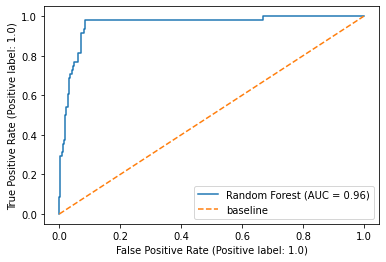

In [45]:
# Roc curve
plot_roc_curve(gb_gridsearch, Xsc_test, y_test, name='Random Forest')
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

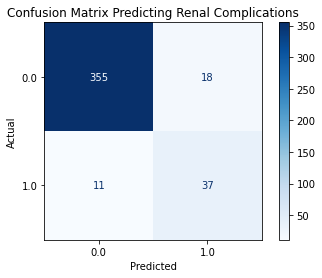

In [46]:
# Plot confusion matrix
plot_confusion_matrix(gb_gridsearch, Xsc_test, y_test,cmap='Blues', 
                      values_format='d')
plt.title("Confusion Matrix Predicting Renal Complications")
plt.xlabel('Predicted')
plt.ylabel('Actual');

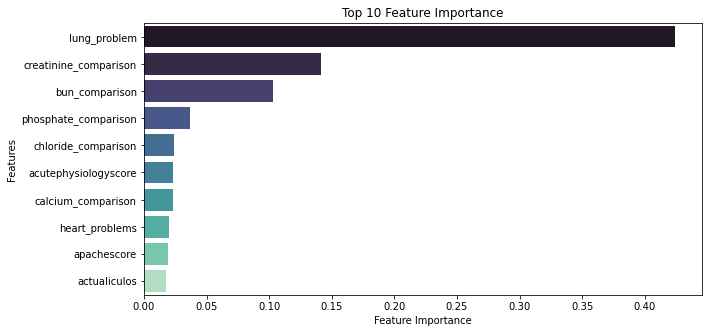

In [47]:
## Plot top 10 feature importance
feature_importance = pd.DataFrame(gb_gridsearch.best_estimator_.steps[1][1].feature_importances_, index = X_train.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

top_10 = feature_importance.head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_10.index,x="Feature Importance", data=top_10, palette = 'mako')
plt.title('Top 10 Feature Importance')
plt.ylabel('Features');